In [ ]:
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Upload the dataset on your drive and import your drive here.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/

 archive.zip   'CHIPS - Heart attack prediction.gsheet'   data.zip   MD.zip
 Certificates  'Colab Notebooks'			  Data.zip   spam.csv


Open the location of the zip folder containing pothole images and unzip it.

In [ ]:
!unzip gdrive/MyDrive/archive.zip

Archive:  gdrive/MyDrive/archive.zip
  inflating: normal/1.jpg            
  inflating: normal/10.jpg           
  inflating: normal/100.jpg          
  inflating: normal/101.jpg          
  inflating: normal/102.jpg          
  inflating: normal/103.jpg          
  inflating: normal/104.jpg          
  inflating: normal/105.jpg          
  inflating: normal/106.jpg          
  inflating: normal/107.jpg          
  inflating: normal/108.jpg          
  inflating: normal/109.jpg          
  inflating: normal/11.jpg           
  inflating: normal/110.jpg          
  inflating: normal/111.jpg          
  inflating: normal/112.jpg          
  inflating: normal/113.jpg          
  inflating: normal/114.jpg          
  inflating: normal/115.jpg          
  inflating: normal/116.jpg          
  inflating: normal/117.jpg          
  inflating: normal/118.jpg          
  inflating: normal/119.jpg          
  inflating: normal/12.jpg           
  inflating: normal/120.jpg          
  inflating: 

Labelling your dataset as "normal" and "potholes"

In [ ]:
directory = '/content'
options = ['normal', 'potholes']
dataset = []
img_size = 224

for i in options:
  #Contains the path of the folder along with each of the image containing folder.
  path_new = os.path.join(directory, i)
  label = options.index(i)   #Takes 0 as normal and 1 as potholes
  print(path_new)
  for image in os.listdir(path_new):
    image_array = cv2.imread(os.path.join(path_new,image), 0)
    try:
      img = cv2.resize(image_array, (img_size,img_size))
    except Exception as e:
      print(str(e))
    dataset.append([img, label])

/content/normal
OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/potholes


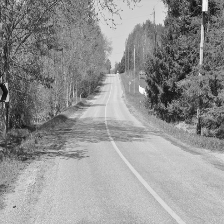

In [ ]:
cv2_imshow(dataset[0][0])

In [ ]:
np.shape(dataset[0][0])

(224, 224)

In [ ]:
len(dataset)

681

Therefore there are 681 images in our dataset

In [ ]:
import random
random.shuffle(dataset)

In [ ]:
x_train = []
y_train = []

for picture, label in dataset:
  x_train.append(picture)
  y_train.append(label)

# Normalize the data
x_train = np.array(x_train)/ 255 #since the images have a maximum of RGB value 255.
y_train = np.array(y_train)
#reshape(n_samples, width, height, n_features)
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1) #We need it in this format because Conv2D takes input in 4 dimensions

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

Making the neural network.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 1)))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200704)           

In [ ]:
opt = Adam(learning_rate = 0.001)
#opt = tf.keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10 , validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


17/17 [==============================] - 36s 2s/step - loss: 3.6839 - accuracy: 0.4959 - val_loss: 0.6944 - val_accuracy: 0.4599
Epoch 2/10
17/17 [==============================] - 34s 2s/step - loss: 0.6878 - accuracy: 0.5547 - val_loss: 0.6009 - val_accuracy: 0.7445
Epoch 3/10
17/17 [==============================] - 35s 2s/step - loss: 0.5138 - accuracy: 0.7474 - val_loss: 0.5738 - val_accuracy: 0.7591
Epoch 4/10
17/17 [==============================] - 35s 2s/step - loss: 0.4576 - accuracy: 0.7891 - val_loss: 0.6027 - val_accuracy: 0.7299
Epoch 5/10
17/17 [==============================] - 35s 2s/step - loss: 0.3885 - accuracy: 0.8272 - val_loss: 0.5137 - val_accuracy: 0.7737
Epoch 6/10
17/17 [==============================] - 35s 2s/step - loss: 0.3220 - accuracy: 0.8448 - val_loss: 0.4712 - val_accuracy: 0.7883
Epoch 7/10
17/17 [==============================] - 35s 2s/step - loss: 0.2336 - accuracy: 0.8947 - val_loss: 0.4784 - val_accuracy: 0.7737
Epoch 8/10
17/17 [=============

**As you can see the accuracy is 97%.**

You can also test the model for an external image that you can import here. 